## Predicting whether a person will buy a life insurance or not based on their age

### Import libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### data exploration

In [4]:
df = pd.read_csv('insurance_data.csv')


In [5]:
# show the top five from the data
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [6]:
# show the bottom five from the data
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


Text(0, 0.5, 'bought insurance')

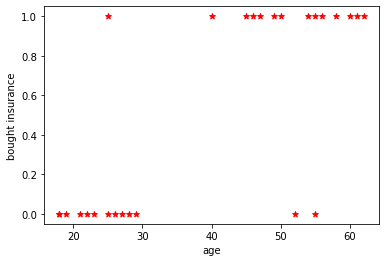

In [12]:
plt.scatter(df.age, df.bought_insurance, marker = '*', color = 'red')
plt.xlabel('age')
plt.ylabel('bought insurance')

### spliting the dataset

In [13]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size = 0.2, random_state = 2)

In [27]:
y_train

6     0
3     0
17    1
24    1
14    1
4     1
10    0
5     1
19    0
1     0
2     1
7     1
23    1
21    0
18    0
11    0
22    1
26    0
13    0
15    1
8     1
Name: bought_insurance, dtype: int64

### Predicting the model

In [28]:
# here we use Logistic regression technique to slove binary classifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)


LogisticRegression()

In [32]:
x_test

,age
25,54
0,22
9,61
20,21
16,25
12,27


In [34]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 1, 0, 0, 0], dtype=int64)

In [37]:
y_test

25    1
0     0
9     1
20    0
16    1
12    0
Name: bought_insurance, dtype: int64

In [36]:
model.predict_proba(x_test)

array([[0.11926354, 0.88073646],
       [0.95178274, 0.04821726],
       [0.04355309, 0.95644691],
       [0.95844557, 0.04155443],
       [0.92522499, 0.07477501],
       [0.90062385, 0.09937615]])

In [38]:
# check the accurary of our model
model.score(x_test, y_test)

0.8333333333333334

### Optional

In [39]:
# model.coef_ indicates value of m in y = m*x + b equation
model.coef_

array([[0.15568883]])

In [40]:
# model.intercept_ indicates value of b in y = m*x + b equation
model.intercept_

array([-6.40777392])

In [41]:
# sigmoid function
import math
def sigmoid(z):
    return 1 / (1 + math.exp(-z))


In [42]:
# predicting the age by using sigmoid function
def prediction_function(age):
    z = 0.156*age + -6.41
    y = sigmoid(z)
    return y


In [43]:
age = 45
prediction_function(age)

0.6479408020806501

#### 0.647 is more than 0.5 so the person will buy the insurance

In [45]:
age = 31
prediction_function(age)

0.1716469075389188

#### 0.171 is less than 0.5 so the person will not buy the insurance